# ANLY590 HW0
## Jun Wang
## 9/16/2018

_Regularization. Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.<br>
https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad (Links to an external site.)Links to an external site._

 
### Problem 1
### 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

Hitters = pd.read_csv('Hitters.csv')
#print(Hitters.head())

# remove dummy variables and NA
num_idx = []
for i, t in enumerate(Hitters.dtypes):
    if str(t) in ["int64", "float64"]:
        num_idx.append(i)
    df = Hitters.iloc[:,num_idx]

df = df.dropna()
print(df.head())

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  
1   414     375      632       43      10   475.0  
2   266     263      880       82      14   480.0  
3   838     354      200       11       3   500.0  
4    46      33      805       40       4    91.5  
5   336     194      282      421      25   750.0  


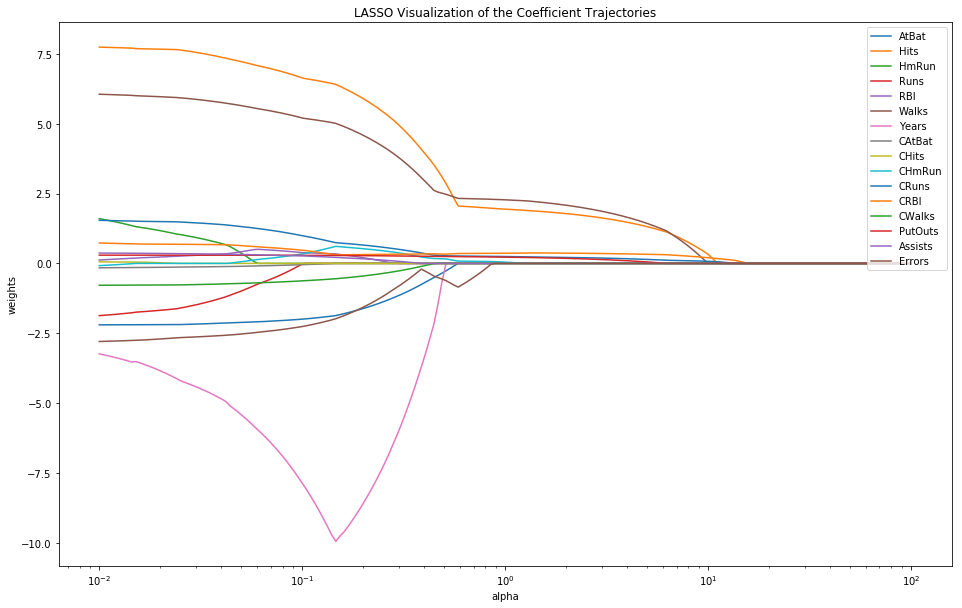

In [2]:
#Create a visualization of the coefficient trajectories. 
alphas = np.logspace(-2,2,200)
alphas

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(16, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.title('LASSO Visualization of the Coefficient Trajectories')
plt.legend(list(X), loc=1)

In [3]:
#Comment on which are the final three predictors that remain in the model. 
lasso = Lasso(max_iter = 10000, normalize = True)
#Based on the graph above, there are three non-zero predictor around alpha = 10.5
#Then try the lasso model with that alpha and print out the coefs.
lasso.set_params(alpha=10.5)
lasso.fit(X, Y)
table = pd.DataFrame()
table['Predictor']=X.columns
table['Coefs']=list(lasso.coef_)
table

,Predictor,Coefs
0,AtBat,0.000000
1,Hits,0.183459
2,HmRun,0.000000
3,Runs,0.000000
4,RBI,0.000000
5,Walks,0.000000
6,Years,0.000000
7,CAtBat,0.000000
8,CHits,0.000000
9,CHmRun,0.000000


__Based on the result table above, the final three predictors that remain in the model are Hits, CRuns, and CRBI.__

In [4]:
#Use cross-validation to find the optimal value of the regularization penality.
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, Y)
opitmal_alpha = lassocv.alpha_
print(lassocv.alpha_)


0.0635481759986


In [5]:
#How many predictors are left in that model?
lasso = Lasso(max_iter = 10000, normalize = True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, Y)
opt_table = pd.DataFrame()
opt_table['Predictor']=X.columns
opt_table['Coefs']=list(lasso.coef_)
opt_table

,Predictor,Coefs
0,AtBat,-2.082954
1,Hits,7.041011
2,HmRun,0.000000
3,Runs,-0.682615
4,RBI,0.496552
5,Walks,5.511781
6,Years,-6.107625
7,CAtBat,-0.087066
8,CHits,0.000000
9,CHmRun,0.156468


$\qquad$With the optimal alpha, there are 14 predictors left in the model (except HmRum and CHits, the rest are all remained).

### 1.2 Repeat with Ridge Regression. 

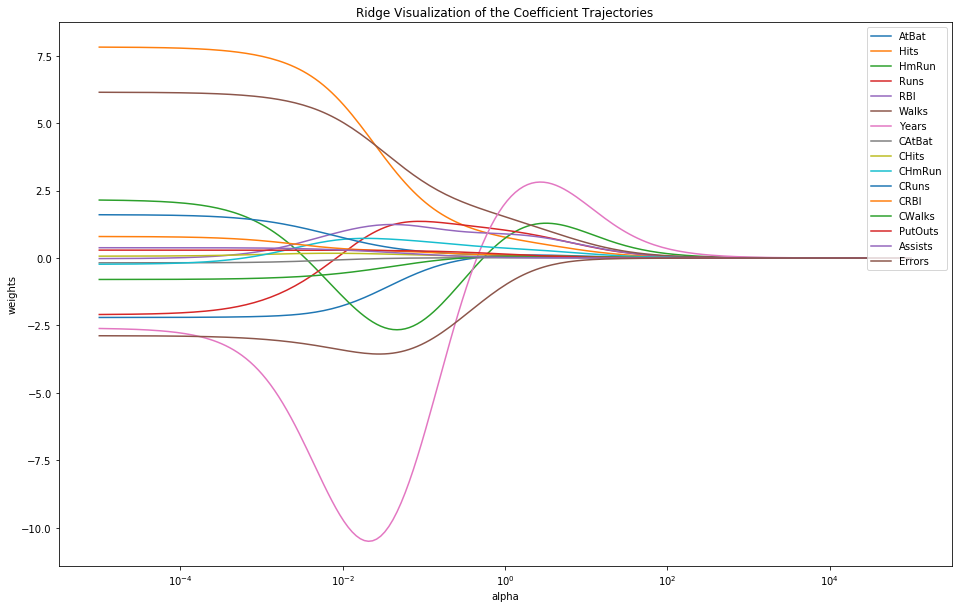

In [6]:
#Create a visualization of the coefficient trajectories. 
alphas = np.logspace(-5,5,200)
alphas

ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

# Plot alpha-coefficient relation# Plot  
plt.figure(figsize=(16, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.title('Ridge Visualization of the Coefficient Trajectories')
plt.legend(list(X), loc=1)

#### _Comment on which are the final three predictors that remain in the model. _
$\qquad$By the definition of Ridge Model, there is no last three predictors, since all coefs are approach to zero but not exactly zero, therefore, all the predictors are still remain in the model.

In [7]:
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize=True)
ridgecv.fit(X, Y)
opitmal_alpha = ridgecv.alpha_
print(opitmal_alpha)

0.943787827778


### Problem 2 Short Answer. 
#### _Explain in your own words the bias-variance tradeoff. _
$\qquad$Bias discribes how well a model is able to predict the value given a specific data set. High bias indicates that the model (is too simple) does not fit the data set well, while low bias means the model (is complex enough) does fit the data set well.<br>
$\qquad$Variance is the sensitivity to small changes in data set, it discribes how well a model is able to fit with different data sets. High variance indicateds that the difference between the errors from different sets are large, i.e. the model is not that good, while low variance means the difference between the errors are small, i.e. the model is good.<br>
$\qquad$For instance, given a training set, if the model has low bias, then the model fit the training set well. Given the training set and test set, if the difference between the training error and the test error is small, then the model has small variance and is a good model to use.<br>
$\qquad$The Bias-Variance Tradeoff is property which indicates that if the model has a lower bias for estimating the parameters, it would has a higer variance across different sets. It is hard to obtain a model with very a low bias as well as a low variance. Since when the bias getting smaller, the model become more complex, it would more likely be overfitting the data set, and the difference between the sample errors would most likely be large.<br>

#### _What role does regularization play in this tradeoff? _
$\qquad$Regularization helps to indicate which predictors are more siginificant and which are not that important. It leads the increase on bias and decrease on variance when we dropping off the not important predictors i.e. making the model less flexible.

#### _Make reference to your findings in number (1) to describe models of high/low bias and variance._
$\qquad$On order to show this, I split the data set into training set and test set, and compute the MSE under different alphas for both Lasso and Ridge Regression.

In [8]:
#With Lasso
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=1)
alphas = [0.01, 0.1, 0.5, 1, 5, 15, 50, 100]

lasso_train_MSE=[]
lasso_test_MSE=[]

lasso = Lasso(max_iter = 10000, normalize = True)
for a in alphas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, Y_train)
    lasso_train_MSE.append(mean_squared_error(Y_train, lasso.predict(X_train)))
    lasso_test_MSE.append(mean_squared_error(Y_test, lasso.predict(X_test)))

lasso_table = pd.DataFrame()
lasso_table['Alpha'] = alphas
lasso_table['Training MSE'] = lasso_train_MSE
lasso_table['Test MSE'] = lasso_test_MSE
lasso_table
    

,Alpha,Training MSE,Test MSE
0,0.01,151973.002387,130237.515804
1,0.10,151973.002387,130237.515804
2,0.50,151973.002387,130237.515804
3,1.00,151973.002387,130237.515804
4,5.00,151973.002387,130237.515804
5,15.00,151973.002387,130237.515804
6,50.00,151973.002387,130237.515804
7,100.00,151973.002387,130237.515804


In [9]:
#With Ridge
ridge_train_MSE=[]
ridge_test_MSE=[]

ridge = Ridge(normalize=True)
for a in alphas:
    ridge.set_params(alpha=i)
    ridge.fit(X_train, Y_train)
    ridge_train_MSE.append(mean_squared_error(Y_train, ridge.predict(X_train)))
    ridge_test_MSE.append(mean_squared_error(Y_test, ridge.predict(X_test)))

ridge_table = pd.DataFrame()
ridge_table['Alpha'] = alphas
ridge_table['Training MSE'] = ridge_train_MSE
ridge_table['Test MSE'] = ridge_test_MSE
ridge_table

,Alpha,Training MSE,Test MSE
0,0.01,192801.262421,141677.299372
1,0.10,192801.262421,141677.299372
2,0.50,192801.262421,141677.299372
3,1.00,192801.262421,141677.299372
4,5.00,192801.262421,141677.299372
5,15.00,192801.262421,141677.299372
6,50.00,192801.262421,141677.299372
7,100.00,192801.262421,141677.299372


$\qquad$From the above tables, when alpha increases, the training MSE increase, i.e. the bias of the model increases, and the test MSE and training MSE are first getting closer i.e. the model is getting less overfitting (variance decreases) until reach the optimal alpha. However, after the optimal alpha, as alpha keep increasing, the training MSE still increases, i.e. the bias of the model getting bigger and bigger; the test MSE and training MSE are getting further away from each other and the model is getting worse. 